# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/clusters.csv')
# copy = data;
data.sample(10)

,A,B,C
349,1.060059,-0.097133,1.103507
941,-0.359159,0.001032,-0.926171
939,0.829377,0.665608,0.022644
141,0.970347,0.892624,0.425732
294,2.503480,3.074821,2.639944
58,3.027699,1.621549,3.400769
105,0.707959,0.395777,1.381176
177,1.479295,1.571586,2.549592
335,1.774250,2.541382,0.622447
405,-0.648807,1.379907,0.347012


A    0
B    0
C    0
dtype: int64

Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

In [3]:
# Your code to create a clustering solution

# convert to 2D using PCA
from sklearn.preprocessing import MinMaxScaler;
from sklearn.decomposition import PCA;


preprocessed = MinMaxScaler(feature_range=(0,1)).fit_transform(data);
preprocessed

data_2d = PCA(n_components=2).fit_transform(preprocessed)
data_2d



array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       ...,
       [-0.13072154,  0.0767816 ],
       [ 0.43722666, -0.02364599],
       [-0.21179279,  0.02825676]])

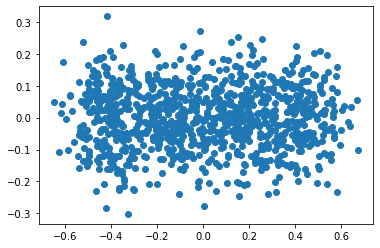

In [6]:
# Plot 2D data

import matplotlib.pyplot as plt

fig = plt.figure();

plt.scatter(data_2d[:,0] , data_2d[:,1]);
plt.show()

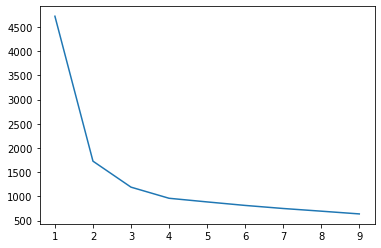

In [8]:
# decide cluster number 

from sklearn.cluster import KMeans


wcss = [];

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data.values)
    wcss.append(kmeans.inertia_)
wcss

plt.plot(range(1,10), wcss)

# three clusters will do fine


In [16]:
model = KMeans(n_clusters=3,init='k-means++', n_init=100, max_iter=1000);

km_clusters = model.fit_predict(data.values);

km_clusters[10:100]


array([2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1,
       2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2,
       2, 0], dtype=int32)

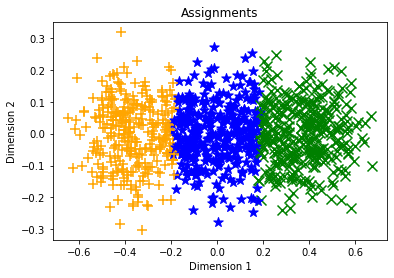

In [17]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(data_2d, km_clusters)

In [22]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(data.values)
agg_clusters[10:100]

array([2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2,
       2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0])

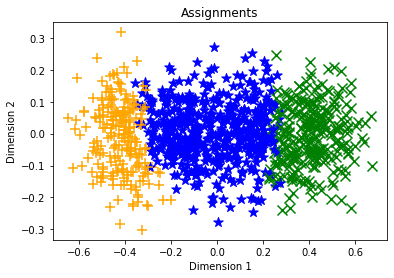

In [23]:
plot_clusters(data_2d, agg_clusters)
